In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings("ignore")

## Logistic Regression

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

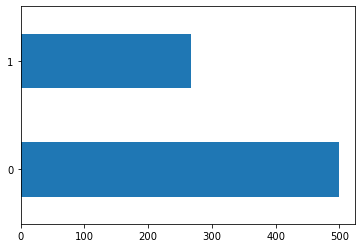

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [8]:
# statsmodel

In [9]:
loj = sm.Logit(y,X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 25 Oct 2023   Pseudo R-squ.:                 0.05922
Time:                        13:40:28   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [10]:
# scikit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [12]:
loj_model.intercept_

array([-5.88679617])

In [13]:
loj_model.coef_

array([[ 1.16994476e-01,  2.83733435e-02, -1.68981359e-02,
         7.55145090e-04, -6.41407258e-04,  5.97201268e-02,
         6.76128123e-01,  7.23498971e-03]])

## Tahmin & Model Tuning

In [14]:
y_pred = loj_model.predict(X)

In [15]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [18]:
loj_model.predict(X)[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
loj_model.predict_proba(X)[0:10][:,0:1]

array([[0.3505852 ],
       [0.91692518],
       [0.22489628],
       [0.92127453],
       [0.16759435],
       [0.79886109],
       [0.8800353 ],
       [0.27795677],
       [0.32053464],
       [0.92264521]])

In [20]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [21]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [22]:
y_probs[0:10]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565,
       0.20113891, 0.1199647 , 0.72204323, 0.67946536, 0.07735479])

In [23]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [24]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [25]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [26]:
accuracy_score(y, y_pred)

0.7747395833333334

In [27]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [28]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.6494148 , 0.08307482, 0.77510372, 0.07872547, 0.83240565])

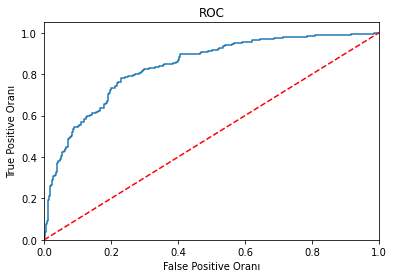

In [29]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= "AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Oranı")
plt.ylabel("True Positive Oranı")
plt.title("ROC")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [31]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [32]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [33]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7704710144927536

## Gaussian Naive Bayes

In [34]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
nb = GaussianNB()
nb_model = nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [37]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [38]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [39]:
y_pred = nb_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [41]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.775

## KNN

### Model & Tahmin

In [42]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [43]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [47]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [48]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [49]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [50]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [51]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [52]:
y_pred = knn_tuned.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7316017316017316

## SVC

## Model & Tahmin

In [54]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [55]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [56]:
svm_model

SVC(kernel='linear')

In [57]:
y_pred = svm_model.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.7445887445887446

## Model Tuning

In [59]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel="linear")

svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-1, verbose=2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [60]:
print("En iyi parametreler:" +str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 5}


In [61]:
svc_tuned = SVC(kernel="linear", C=5).fit(X_train, y_train)

In [62]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

## RADIAL BASIS FUNCTION & SUPPORT VECTOR CLASSIFICATION (RBF & SVC)

In [63]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [64]:
svc_model = SVC(kernel="rbf").fit(X_train, y_train)

In [65]:
svc_model

SVC()

In [66]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

## Model Tuning

In [67]:
svc_params = {"C": [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100],
              "gamma": [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100]}

In [68]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs=-2, verbose=2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.01, 1, 5, 10, 50, 100]},
             verbose=2)

In [69]:
print("En iyi parametreler:" +str(svc_cv_model.best_params_))

En iyi parametreler:{'C': 10, 'gamma': 0.0001}


In [70]:
svc_tuned = SVC(C=10, gamma= 0.0001).fit(X_train, y_train)

In [71]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

## Artificial Neural Network

In [72]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [77]:
from sklearn.neural_network import MLPClassifier

In [78]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [79]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model

In [80]:
mlpc

MLPClassifier()

In [81]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\asus_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : {'lbfgs', 'sgd', 'adam'}, default='a

In [82]:
mlpc_params = {"alpha" : [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               "hidden_layer_sizes": [(10,10,10),(100,100,100),(100,100),(3,5),(5,3)],
               "solver": ["lbfgs","adam","sgd"],
               "activation": ["relu","logistic"]}

In [83]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs= -1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [84]:
print("En iyi parametreler:" +str(mlpc_cv_model.best_params_))

En iyi parametreler:{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'adam'}


In [85]:
mlpc_tuned = MLPClassifier(activation="relu", alpha=0.1, hidden_layer_sizes = (10,10,10), solver="adam")

In [86]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10, 10, 10))

In [87]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7662337662337663

## CART

In [88]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [91]:
cart_model

DecisionTreeClassifier()

In [92]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[2] <= 
    65.0 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 1 if x[2] <= 67.0 else 0) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 1 if 
    x[6] <= 0.32649999111890793 else 0) if x[5] <= 30.300000190734863 else 
    1 if x[5] <= 32.000000953674316 else ((0 if x[5] <= 33.75 else 1) if x[
    0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <= 85.0 else
    1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else
    (1 if x[6] <= 0.3685000091791153 else 0) if x[1] <= 135.0 else 0) if x[
    2] <= 94.0 else 1 if x[2] <= 97.0 else 0) if x[5] <= 26.949999809265137
  

In [93]:
x = [3]

In [94]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

0

In [95]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [96]:
cart_model

DecisionTreeClassifier()

In [97]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\asus_\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int,

In [98]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split" : list(range(2,50))}

In [99]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs=-1, verbose=2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [100]:
print("En iyi parametreler:" +str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 5, 'min_samples_split': 19}


In [101]:
cart = tree.DecisionTreeClassifier(max_depth=5 , min_samples_split=19)
cart_tuned = cart.fit(X_train,y_train)

In [102]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forests

In [103]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [106]:
rf_model

RandomForestClassifier()

In [107]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [108]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10, 500,1000],
             "min_samples_split": [2,5,10]}

In [109]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs = -2, verbose=2)

In [110]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [111]:
print("En iyi parametreler:" +str(rf_cv_model.best_params_))

En iyi parametreler:{'max_depth': 8, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 10}


In [112]:
rf_tuned = RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5, n_estimators=10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=10)

In [113]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [114]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},index= X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

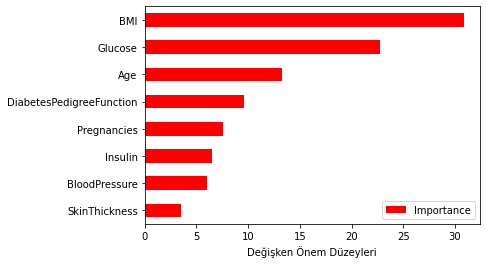

In [115]:
Importance.sort_values(by = "Importance",axis=0, ascending=True).plot(kind="barh", color="r")

plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Boosting Machines

In [116]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [119]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [120]:
gbm_model

GradientBoostingClassifier()

In [121]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100, 500,1000],
              "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [122]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1, verbose=2)

In [123]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [124]:
print("En iyi parametreler:" + str(gbm_cv.best_params_))

En iyi parametreler:{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [125]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, max_depth=3, min_samples_split=5,n_estimators=100)

In [126]:
gbm_tuned = gbm.fit(X_train,y_train)

In [127]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## XGBOOST

In [128]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [129]:
from xgboost import XGBClassifier

In [130]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [131]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [132]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [133]:
xgb_params = {"n_estimators": [100, 500,1000,2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth": [3,4,5,6],
              "learning_rate": [0.1, 0.01, 0.02, 0.05],
              "min_samples_split": [2,5,10]}

In [134]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2)

In [135]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[14:22:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [136]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [137]:
xgb = XGBClassifier(learning_rate = 0.02, max_depth=3 ,min_samples_split=2, n_estimators=100, subsample=0.6)

In [138]:
xgb_tuned = xgb.fit(X_train, y_train)

[14:22:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [139]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

## LightGBM

In [140]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [141]:
from lightgbm import LGBMClassifier

In [142]:
lgbm_model = LGBMClassifier(verbose=-1).fit(X_train, y_train)

In [143]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [144]:
lgbm_params = {"n_estimators": [100, 500,1000,2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth": [3,4,5,6],
              "learning_rate": [0.1, 0.01, 0.02, 0.05],
              "min_child_samples": [5,10,20]}

In [145]:
lgbm = LGBMClassifier(verbose=-1)

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2)

In [146]:
lgbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(verbose=-1), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [147]:
lgbm_tuned =lgbm.fit(X_train, y_train)

In [148]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7229437229437229

## Categoric Boosting (CatBoost)

In [149]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30, random_state=42)

In [150]:
from catboost import CatBoostClassifier

In [151]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 189ms	remaining: 3m 8s
1:	learn: 0.6843414	total: 192ms	remaining: 1m 35s
2:	learn: 0.6805760	total: 195ms	remaining: 1m 4s
3:	learn: 0.6765782	total: 198ms	remaining: 49.3s
4:	learn: 0.6720829	total: 201ms	remaining: 40s
5:	learn: 0.6681617	total: 204ms	remaining: 33.8s
6:	learn: 0.6641912	total: 207ms	remaining: 29.3s
7:	learn: 0.6602881	total: 210ms	remaining: 26s
8:	learn: 0.6562626	total: 212ms	remaining: 23.4s
9:	learn: 0.6528483	total: 215ms	remaining: 21.3s
10:	learn: 0.6487823	total: 218ms	remaining: 19.6s
11:	learn: 0.6454980	total: 221ms	remaining: 18.2s
12:	learn: 0.6418953	total: 223ms	remaining: 16.9s
13:	learn: 0.6374431	total: 226ms	remaining: 15.9s
14:	learn: 0.6339676	total: 229ms	remaining: 15s
15:	learn: 0.6304252	total: 231ms	remaining: 14.2s
16:	learn: 0.6266998	total: 234ms	remaining: 13.5s
17:	learn: 0.6237660	total: 236ms	remaining: 12.9s
18:	learn: 0.6204394	total: 239ms	remaining: 12.3s
19:	learn: 0.61701

In [152]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [153]:
catb_params = {"iterations": [200,500],
               "learning_rate": [0.01,0.05, 0.1],
               "depth": [3,5,8]}

In [154]:
catb= CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs=-1, verbose=2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 4.04ms	remaining: 804ms
1:	learn: 0.6811157	total: 7.77ms	remaining: 770ms
2:	learn: 0.6752970	total: 11.8ms	remaining: 772ms
3:	learn: 0.6697432	total: 15.9ms	remaining: 778ms
4:	learn: 0.6641758	total: 20ms	remaining: 781ms
5:	learn: 0.6576656	total: 24.1ms	remaining: 781ms
6:	learn: 0.6521870	total: 28.2ms	remaining: 778ms
7:	learn: 0.6465564	total: 32.2ms	remaining: 774ms
8:	learn: 0.6407595	total: 36.3ms	remaining: 771ms
9:	learn: 0.6357725	total: 40.5ms	remaining: 769ms
10:	learn: 0.6299942	total: 44.8ms	remaining: 770ms
11:	learn: 0.6240480	total: 48.8ms	remaining: 765ms
12:	learn: 0.6196095	total: 53ms	remaining: 762ms
13:	learn: 0.6148715	total: 57.2ms	remaining: 760ms
14:	learn: 0.6092626	total: 61.2ms	remaining: 755ms
15:	learn: 0.6046764	total: 65.5ms	remaining: 753ms
16:	learn: 0.6012725	total: 69.9ms	remaining: 752ms
17:	learn: 0.5958121	total: 74.3ms	remaining: 751ms
18:	learn: 0.5903

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [155]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [156]:
catb = CatBoostClassifier(iterations = 200, learning_rate=0.01, depth = 8)
catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 4.18ms	remaining: 832ms
1:	learn: 0.6811157	total: 8.71ms	remaining: 862ms
2:	learn: 0.6752970	total: 13ms	remaining: 857ms
3:	learn: 0.6697432	total: 17.4ms	remaining: 852ms
4:	learn: 0.6641758	total: 21.1ms	remaining: 823ms
5:	learn: 0.6576656	total: 24.9ms	remaining: 805ms
6:	learn: 0.6521870	total: 29ms	remaining: 799ms
7:	learn: 0.6465564	total: 32.9ms	remaining: 788ms
8:	learn: 0.6407595	total: 36.6ms	remaining: 777ms
9:	learn: 0.6357725	total: 40.5ms	remaining: 770ms
10:	learn: 0.6299942	total: 44.6ms	remaining: 766ms
11:	learn: 0.6240480	total: 48.5ms	remaining: 759ms
12:	learn: 0.6196095	total: 52.4ms	remaining: 754ms
13:	learn: 0.6148715	total: 56.6ms	remaining: 753ms
14:	learn: 0.6092626	total: 60.5ms	remaining: 746ms
15:	learn: 0.6046764	total: 64.7ms	remaining: 744ms
16:	learn: 0.6012725	total: 68.7ms	remaining: 740ms
17:	learn: 0.5958121	total: 72.8ms	remaining: 736ms
18:	learn: 0.5903243	total: 76.8ms	remaining: 731ms
19:	learn: 0.5866024	total

In [157]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

## Tüm Modellerin Karşılaştırılması

In [158]:
modeller = [knn_tuned,
            loj_model,
            svc_tuned,
            nb_model,
            mlpc_tuned,
            cart_tuned,
            rf_tuned,
            gbm_tuned,
            catb_tuned,
            lgbm_tuned,
            xgb_tuned]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    print("-"*28)
    print(isimler+ ":")
    print("Accuracy: {:.4%}".format(dogruluk))
    

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 35.4978%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 73.5931%
----------------------------
GradientBoostingClassifier:
Accuracy: 74.4589%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 72.2944%
----------------------------
XGBClassifier:
Accuracy: 75.7576%


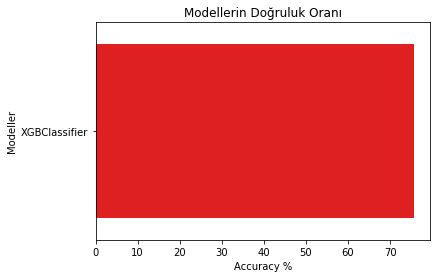

In [159]:
sonuc = []

sonuclar = pd.DataFrame(columns=["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler,dogruluk*100]], columns=["Modeller","Accuracy"])
    sonuclar= sonuc.append(sonuc)
    
sns.barplot(x="Accuracy", y="Modeller",data=sonuclar, color="r")
plt.xlabel("Accuracy %")
plt.title("Modellerin Doğruluk Oranı");